# 1. 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 만든다.

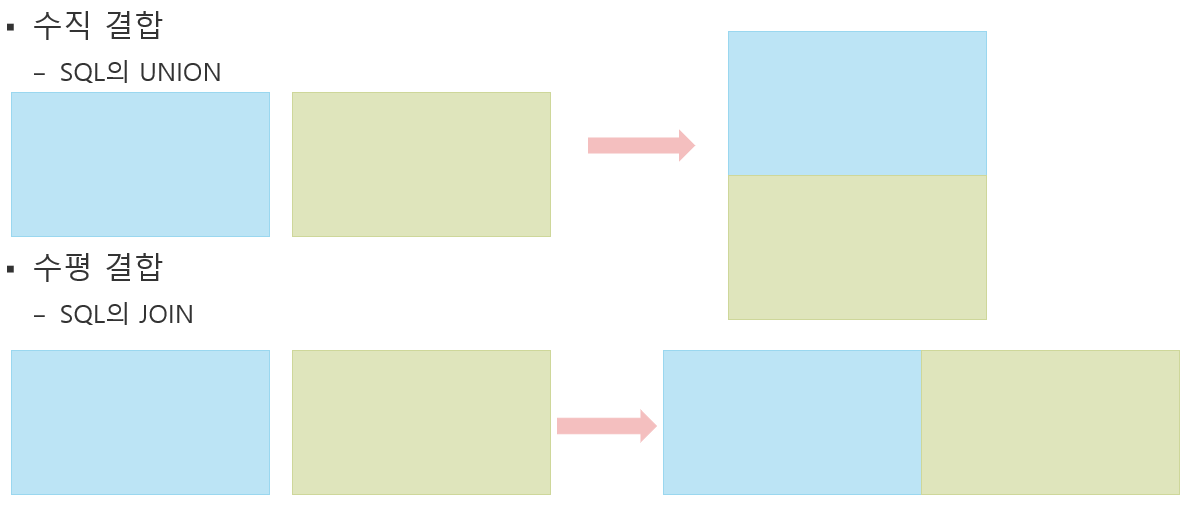

- **수직결합**
    - 단순결합으로 여러개의 DataFrame들의 같은 컬럼끼리 수직으로 합친다.
- **수평결합**
    - 연관성 있는 여러 데이터를 하나로 합쳐서 조회하는 JOIN 처리를 한다.
    - 합치려는 DataFrame의 index 나 특정 컬럼의 값이 같은 행 끼리 합친다.

## 1.1. 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [1]:
# 위 data set을 읽는다.

import pandas as pd

df_1 = pd.read_csv("data/stocks_2016.csv")
df_2 = pd.read_csv("data/stocks_2017.csv")
df_3 = pd.read_csv("data/stocks_2018.csv")
df_4 = pd.read_csv("data/stocks_info.csv")

In [4]:
# 위 data set을 DataFrame으로 읽는다.

file_name = ["2016", "2017", "2018", "info"]
stocks_2016, stocks_2017, stocks_2018, stocks_info = [ pd.read_csv(f"data/stocks_{txt}.csv") for txt in file_name ]

In [6]:
# 각 DataFrame의 shape을 확인해보자.

stocks_2016.shape, stocks_2017.shape, stocks_2018.shape, stocks_info.shape

((3, 4), (6, 4), (3, 4), (8, 2))

In [7]:
stocks_2016

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70


In [ ]:
# 년도별 보유 주식 DataFrame은 각 회사의 symbol로 구성되어 있는데 symbol이 어떤 회사인지 확인할 수 있는
# DataFrame이 stocks_info 이다.

In [ ]:
# 분석을 위해서는 각 DataFrame을 합칠 필요가 있다. 이때 stocks_2016, stocks_2017, stocks_2018은 수직 결합을 해야한다.
# 서로 같은 column name을 가지고 있기 때문이다.
# 그리고 이들과 stocks_info는 수평 결합을 해야한다. 왜냐하면 년도별 보유 주식 DataFrame의 각 회사 Symbol이
# 어떤 회사인지를 쉽게 알게 하기 위해서이다.
# 이 과정을 통해 전체 주식 거래 내역 DataFrame을 생성할 수 있다.

In [ ]:
# 그 방법은 다음 내용에 적혀있다.

## 1.2. concat() 이용
- 수직, 수평 결합 모두 지원한다.
- 하나의 데이터셋을 여러 DataFrame으로 나눈 것을 하나의 DataFrame으로 합칠 때 사용한다.

- 수직 결합 (행이 늘어나도록 합친다.)
    - **컬럼명이 같은 열끼리 합친다.**
    - 같은 column 명이 없는 열들도 결과 DataFrame에 들어간다.(default)
        - full outer join개념

- 수평결합합(열이 늘어나도록 합친다.)
    - **index명이 같은 행 끼리 합친다.** (equi-join)
    - 같은 index명이 없는 행들도 결과 DataFrame에 들어간다.(default)
        - full outer join

- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 합치는 방식으로 다음 문자열을 값으로 설정한다.
                - 'outer'(기본값): full outer join
                - 'inner': inner join (동일한 index명, column명 끼리 합친다.)

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것.
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것.
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [8]:
# concat() 사용 방법

In [9]:
# 수직 결합을 하는 방법

# parameter objs
pd.concat( [stocks_2016, stocks_2017, stocks_2018] )

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [10]:
# stocks_info도 같이 수직 결합을 했을 때 다음과 같은 결과가 나온다.

pd.concat( [stocks_2016, stocks_2017, stocks_2018, stocks_info] )

# 보이는 결과와 같이 없는 값에 대해서는 NaN이 입력된다.

,Symbol,Shares,Low,High,Name
0,AAPL,80.0,95.0,110.0,NaN
1,TSLA,50.0,80.0,130.0,NaN
2,WMT,40.0,55.0,70.0,NaN
0,AAPL,50.0,120.0,140.0,NaN
1,GE,100.0,30.0,40.0,NaN
2,IBM,87.0,75.0,95.0,NaN
3,SLB,20.0,55.0,85.0,NaN
4,TXN,500.0,15.0,23.0,NaN
5,TSLA,100.0,100.0,300.0,NaN
0,AAPL,40.0,135.0,170.0,NaN


In [11]:
# parameter join
# join = "inner"
# DataFrame에 모두 있는 것들만 결합시킬 때 join = "inner"를 입력한다.

pd.concat( [stocks_2016, stocks_2017, stocks_2018, stocks_info], join = "inner" )

,Symbol
0,AAPL
1,TSLA
2,WMT
0,AAPL
1,GE
2,IBM
3,SLB
4,TXN
5,TSLA
0,AAPL


In [12]:
# parameter axis
# axis = 1
# row index name이 같은 것끼리 결합한다. 이 경우에서도 역시 없는 값에 대해서는 NaN이 입력된다.

pd.concat( [stocks_2016, stocks_2017, stocks_2018], axis = 1)

,Symbol,Shares,Low,High,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140,AAPL,40.0,135.0,170.0
1,TSLA,50.0,80.0,130.0,GE,100,30,40,AMZN,8.0,900.0,1125.0
2,WMT,40.0,55.0,70.0,IBM,87,75,95,TSLA,50.0,220.0,400.0
3,NaN,NaN,NaN,NaN,SLB,20,55,85,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,TXN,500,15,23,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [ ]:
# 년도별로 합친다.

In [13]:
pd.concat( [stocks_2016, stocks_2017, stocks_2018] )

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [17]:
# parameter ignore_index

# 위 결합 DataFrame의 index name은 기존 대상 DataFrame으로부터 그대로 받아왔다.
# 이 결합 DataFrame의 index name을 1부터 1씩 증가하도록 바꾼다.
# ignore_index = True
# 결합 DataFrame을 만들 때 대상 DataFrame들의 index name은 무시하고 index name을 붙인다.
# 0부터 1씩 자동 증가하는 값으로 index name을 바꾼다.

result = pd.concat( [stocks_2016, stocks_2017, stocks_2018], ignore_index = True)
result

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [20]:
# parameter keys
# 각각의 DataFrame을 구분할 수 있는 index를 추가할 때 사용한다.
# 그 결과 multi index로 DataFrame이 구성되어 반환된다.
result = pd.concat( [stocks_2016, stocks_2017, stocks_2018], keys = ["2016년", "2017년", "2018년"] )
result

Symbol  Shares  Low  High
2016년 0   AAPL      80   95   110
      1   TSLA      50   80   130
      2    WMT      40   55    70
2017년 0   AAPL      50  120   140
      1     GE     100   30    40
      2    IBM      87   75    95
      3    SLB      20   55    85
      4    TXN     500   15    23
      5   TSLA     100  100   300
2018년 0   AAPL      40  135   170
      1   AMZN       8  900  1125
      2   TSLA      50  220   400

In [23]:
# multi index로 구성된 DataFrame의 data를 조회하는 방법

# 특정 기존 대상 DataFrame을 조회할 때
result.loc["2017년"]

,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [22]:
# 특정 기존 대상 DataFrame의 특정 row를 조회할 때
result.loc[("2018년", 0)]

Symbol    AAPL
Shares      40
Low        135
High       170
Name: (2018년, 0), dtype: object

## 1.3. 조인을 통한 DataFrame 합치기
- 연관성있는 둘 이상의 DataFrame을 하나로 합친다.
    - ex) 고객과 주문정보, 교수와 수업정보, 직원과 부서정보
- join()
    - **2개 이상**의 DataFrame을 조인할 때 사용
- merge()
    - **2개의** DataFrame의 조인만 지원

### 1.3.1. join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 합친다. (equi-join)
    - **조인 기본 방식**: Left Outer Join
- 매개변수
    - lsuffix, rsuffix
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생.
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [28]:
# join() 사용 방법

# 년도별 보유 주식과 주식 정보 DataFrame을 결합해보자.
# 아래와 같은 코드를 작성할 경우 error가 발생한다. 같은 column name이 있기 때문이다.
# stocks_2016과 stocks_info는 모두 같은 symbol이라는 column name을 가지고 있다.
# 이때 suffix parameter를 이용한다.
stocks_info.join(stocks_2017)

ValueError: columns overlap but no suffix specified: Index(['Symbol'], dtype='object')

In [27]:
# parameter lsuffix, rsuffix
stocks_info.join(stocks_2017, lsuffix = "_info", rsuffix = "_2016")

,Symbol_info,Name,Symbol_2016,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50.0,120.0,140.0
1,TSLA,Tesla Inc,GE,100.0,30.0,40.0
2,WMT,Walmart Inc,IBM,87.0,75.0,95.0
3,GE,General Electric,SLB,20.0,55.0,85.0
4,IBM,IBM(International Business Machines Co),TXN,500.0,15.0,23.0
5,SLB,Schlumberger Limited.,TSLA,100.0,100.0,300.0
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN


In [ ]:
# 실행 결과 symbol_info와 symbol_2016으로 column name을 설정해 DataFrame을 만들었다.
# 하지만 서로 대응하지 않는다. 1번 row에서 TSLA가 GE에 대응하는 것처럼 옳지 못한 대응을 보이고 있다.
# 이는 join을 잘못한 것이다. 단순히 index name이 같은 row끼리 join을 했다.
# 원하는 결과를 얻기 위해서는 symbol column 값이 같은 row끼리 join해야 한다.

# 이를 위해서는 다음 과정을 거친다.
# 원하는 column의 값이 같은 data들끼리 같은 row에 오도록 join하는 방법
# 1. 왼쪽에 올 DataFrame에서 Symbol column을 index name으로 설정한다.
# 2. 오른쪽에 올 DataFrame에서 Symbol column을 index name으로 설정한다.
# 3. 이 둘을 join한다.

In [30]:
stocks_info.set_index("Symbol").join(stocks_2017.set_index("Symbol"))

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50.0,120.0,140.0
TSLA,Tesla Inc,100.0,100.0,300.0
WMT,Walmart Inc,NaN,NaN,NaN
GE,General Electric,100.0,30.0,40.0
IBM,IBM(International Business Machines Co),87.0,75.0,95.0
SLB,Schlumberger Limited.,20.0,55.0,85.0
TXN,Texas Instruments Incorporated,500.0,15.0,23.0
AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [31]:
# parameter how
# how = "inner"
# NaN을 모두 제외한 DataFrame을 생성한다.
stocks_info.set_index("Symbol").join(stocks_2017.set_index("Symbol"), how = "inner")

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50,120,140
TSLA,Tesla Inc,100,100,300
GE,General Electric,100,30,40
IBM,IBM(International Business Machines Co),87,75,95
SLB,Schlumberger Limited.,20,55,85
TXN,Texas Instruments Incorporated,500,15,23


In [34]:
# 결합 순서를 반대로 해본다.
# how = "right"
# right outter join을 실행한다. 오른쪽에 올 DataFrame의 모든 row가 다 join 된다.

stocks_2017.set_index("Symbol").join(stocks_info.set_index("Symbol"))

,Shares,Low,High,Name
Symbol,,,,
AAPL,50,120,140,Apple Inc
GE,100,30,40,General Electric
IBM,87,75,95,IBM(International Business Machines Co)
SLB,20,55,85,Schlumberger Limited.
TXN,500,15,23,Texas Instruments Incorporated
TSLA,100,100,300,Tesla Inc


In [ ]:
# 실행 결과 stocks_info의 row가 다 join되지 않았다.
# 이때 how = "right"를 입력하면 된다.

In [35]:
stocks_2017.set_index("Symbol").join(stocks_info.set_index("Symbol"), how = "right")

,Shares,Low,High,Name
Symbol,,,,
AAPL,50.0,120.0,140.0,Apple Inc
TSLA,100.0,100.0,300.0,Tesla Inc
WMT,NaN,NaN,NaN,Walmart Inc
GE,100.0,30.0,40.0,General Electric
IBM,87.0,75.0,95.0,IBM(International Business Machines Co)
SLB,20.0,55.0,85.0,Schlumberger Limited.
TXN,500.0,15.0,23.0,Texas Instruments Incorporated
AMZN,NaN,NaN,NaN,"Amazon.com, Inc"


In [ ]:
# 여러 개의 DataFrame을 join하는 방법

# stocks_info와 stocks_2016, stocks_2017, stocks_2018을 모두 join해보자.
# 년도별 주식 정보 DataFrame은 모두 같은 column name을 가지고 있다. 이때는 lsuffix와 rsuffix를 사용하더라도 해결되지 않는다.
# 이때는 각 DataFrame의 column name을 바꾼 후 join 해야 한다.

# 이를 위해 사용할 수 있는 접미어 / 접두어 method는 다음과 같다.
# df.add_suffix("사용할 접미어")
# df.add_prefix("사용할 접미어")


In [ ]:
# join할 DataFrame의 column name이 모두 같은 경우 join하는 방법
# 1. 각 DataFrame의 column name을 바꾼다.
# 2. 원하는 방식으로 join한다.

In [37]:
stocks_2016_2 = stocks_2016.set_index("Symbol").add_suffix("_2016")
stocks_2017_2 = stocks_2017.set_index("Symbol").add_suffix("_2017")
stocks_2018_2 = stocks_2018.set_index("Symbol").add_suffix("_2018")
stocks_info_2 = stocks_info.set_index("Symbol")

In [38]:
stocks_info_2.join([stocks_2016_2, stocks_2017_2, stocks_2018_2])

,Name,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,,
AAPL,Apple Inc,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,Tesla Inc,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,Walmart Inc,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,General Electric,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,Schlumberger Limited.,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [39]:
# 4개의 DataFrame이 모두 공통적으로 가지는 column에 대해서만 join하는 경우

stocks_info_2.join([stocks_2016_2, stocks_2017_2, stocks_2018_2], how = "inner")

,Name,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,,
AAPL,Apple Inc,80,95,110,50,120,140,40,135,170
TSLA,Tesla Inc,50,80,130,100,100,300,50,220,400


### 1.3.2. merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame간의 조인만 가능하다.
    - **조인 기준**
        - **같은 컬럼명**을 기준으로 equi-join을 하는 것이 기본이다.
        - **조인기준을 다양하게 정할 수 있다.**
            - 컬럼, index등을 기준으로 같은 행끼리 join 하도록 설정할 수 있다.
    - **조인 기본 방식**
        - inner join
        - how 매개변수를 이용해 변경이 가능하다.
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러개일때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명. 
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙인다.       

In [40]:
# merge() 사용 방법

# stocks_2016과 stocks_info를 join해보자.
stocks_2016.merge(stocks_info)

,Symbol,Shares,Low,High,Name
0,AAPL,80,95,110,Apple Inc
1,TSLA,50,80,130,Tesla Inc
2,WMT,40,55,70,Walmart Inc


In [ ]:
# 보이는 것과 같이 같은 공통적으로 가지고 있는 column name의 값이 같은 것끼리 join한다.
# 여기서는 Symbol이 공통적으로 가지고 있는 column name이다.
# 그래서 Symbol 값이 같은 것끼리 join한 것이다.
# 기본 join 방식은 inner라는 것을 알 수 있다.

In [43]:
# parameter how
# how = "right"
stocks_2016.merge(stocks_info, how = "right")

,Symbol,Shares,Low,High,Name
0,AAPL,80.0,95.0,110.0,Apple Inc
1,TSLA,50.0,80.0,130.0,Tesla Inc
2,WMT,40.0,55.0,70.0,Walmart Inc
3,GE,NaN,NaN,NaN,General Electric
4,IBM,NaN,NaN,NaN,IBM(International Business Machines Co)
5,SLB,NaN,NaN,NaN,Schlumberger Limited.
6,TXN,NaN,NaN,NaN,Texas Instruments Incorporated
7,AMZN,NaN,NaN,NaN,"Amazon.com, Inc"


In [44]:
# parameter on & index
# 서로 다른 column name을 기준으로 join하는 방법
# stocks_info와 stocks_2016_2는 공통적으로 가지고 있는 column name이 없다.

# 이때 on과 index parameter를 사용한다.

# 왼쪽 DataFrame에서는 Symbol column을 join 기준으로 설정하고
# 오른쪽 DataFrame에서는 inde name을 join 기준으로 설정한다.



stocks_info.merge(stocks_2016_2, left_on = "Symbol", right_index = True)

,Symbol,Name,Shares_2016,Low_2016,High_2016
0,AAPL,Apple Inc,80,95,110
1,TSLA,Tesla Inc,50,80,130
2,WMT,Walmart Inc,40,55,70


In [45]:
# 반대 방향으로 join할 때는 다음과 같은 코드를 작성한다.

stocks_2016_2.merge(stocks_info, left_index = True, right_on = "Symbol")

,Shares_2016,Low_2016,High_2016,Symbol,Name
0,80,95,110,AAPL,Apple Inc
1,50,80,130,TSLA,Tesla Inc
2,40,55,70,WMT,Walmart Inc


In [46]:
# parameter on

# stocks_2016과 stocks_2018을 join해보자.
# 이 둘은 column name이 모두 같다.
# 그래서 아무런 설정을 하지 않고 join하면 이 4개의 column name에 대한 값이 모두 같을 때만 join한다.

# 이때 parameter on을 사용한다.
# 같은 column name이 여러 개일 때 join 기준으로 설정할 column name을 직접 설정하는 것이다.
# 아래는 4개의 column 중 Sybol column 값이 같을 때만 join하겠다는 뜻이다.

stocks_2016.merge(stocks_2018, on = "Symbol")

,Symbol,Shares_x,Low_x,High_x,Shares_y,Low_y,High_y
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


In [47]:
# parameter suffixes

# 위와 같인 공통적인 column name에 대해 기본적으로 x와 y의 접미어를 붙인다.
# 이때 내가 원하는 접미어를 설정할 때 다음과 같이 코드를 작성한다.

stocks_2016.merge(stocks_2018, on = "Symbol", suffixes = ["_2016", "_2018"])

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2018,Low_2018,High_2018
0,AAPL,80,95,110,40,135,170
1,TSLA,50,80,130,50,220,400


- 하나의 데이터셋을 어떤 특정행 또튼 특정열을 기준으로 단순해 분리 한 경우를 합치는 경우 concat() 사용
    - 수직 결합일 경우는 concat()을 사용해야 한다. 
- 서로 연관성 있는 다른 데이터셋을 결합해서 보는 경우 join(), merge()를 사용한다. (Join)
    - **두 개 이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
    - 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편하다.

<b style='font-size:2em'>TODO</b>

In [42]:
# 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.

import pandas as pd

customer = pd.read_csv("data/customer.csv")
order = pd.read_csv("data/order.csv")
qna = pd.read_csv("data/qna.csv")

customer.shape, order.shape, qna.shape

((5, 3), (6, 3), (3, 3))

In [9]:
import pandas as pd

file_names = ["customer", "order", "qna"]
customer, order, qna = [pd.read_csv(f"data/{file_name}.csv") for file_name in file_names]

customer.shape, order.shape, qna.shape

((5, 3), (6, 3), (3, 3))

In [10]:
# 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요. 

customer.info()
customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5 non-null      object
 1   name    5 non-null      object
 2   age     5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


,id,name,age
0,id-1,김영수,33
1,id-2,박선영,23
2,id-3,오정현,21
3,id-4,박명수,40
4,id-5,이철기,17


In [11]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     6 non-null      int64 
 1   cust_id      6 non-null      object
 2   total_price  6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


In [12]:
qna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   qna_no   3 non-null      int64 
 1   cust_id  3 non-null      object
 2   txt      3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [27]:
print(customer.columns)
print(order.columns)
print(qna.columns)

Index(['id', 'name', 'age'], dtype='object')
Index(['order_id', 'cust_id', 'total_price'], dtype='object')
Index(['qna_no', 'cust_id', 'txt'], dtype='object')


In [31]:
# 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.

customer.join(order, how = "left")

,id,name,age,order_id,cust_id,total_price
0,id-1,김영수,33,1,id-1,100000
1,id-2,박선영,23,2,id-1,250000
2,id-3,오정현,21,3,id-2,300000
3,id-4,박명수,40,4,id-2,15000
4,id-5,이철기,17,5,id-2,51000


In [32]:
# 3 customer DataFrame과 order DataFrame을 고객정보는 모두 나오도록 join 하세요.
customer_order_join = customer.merge(order, left_on = "id", right_on = "cust_id", how = "left")
customer_order_join

,id,name,age,order_id,cust_id,total_price
0,id-1,김영수,33,1.0,id-1,100000.0
1,id-1,김영수,33,2.0,id-1,250000.0
2,id-2,박선영,23,3.0,id-2,300000.0
3,id-2,박선영,23,4.0,id-2,15000.0
4,id-2,박선영,23,5.0,id-2,51000.0
5,id-3,오정현,21,NaN,NaN,NaN
6,id-4,박명수,40,6.0,id-4,32000.0
7,id-5,이철기,17,NaN,NaN,NaN


In [36]:
# 4 customer DataFrame의 index를 id컬럼으로 변경.
customer = customer.set_index("id")
customer

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [40]:
# 5 customer DataFrame과 qna DataFrame을 inner join 하세요.
customer.merge(qna, left_index = True, right_on = "cust_id", how = "inner")

,name,age,qna_no,cust_id,txt
0,박명수,40,1,id-4,물건있나요?
1,박명수,40,2,id-4,얼마에요
2,이철기,17,3,id-5,반품은 어떻게 해요?


In [41]:
customer.join(qna.set_index("cust_id"), how = "inner")

,name,age,qna_no,txt
id-4,박명수,40,1,물건있나요?
id-4,박명수,40,2,얼마에요
id-5,이철기,17,3,반품은 어떻게 해요?


In [16]:
customer

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [17]:
order

,order_id,cust_id,total_price
0,1,id-1,100000
1,2,id-1,250000
2,3,id-2,300000
3,4,id-2,15000
4,5,id-2,51000
5,6,id-4,32000


In [18]:
qna

,qna_no,cust_id,txt
0,1,id-4,물건있나요?
1,2,id-4,얼마에요
2,3,id-5,반품은 어떻게 해요?


In [47]:
# 6. 세개의 DataFrame을 고객정보는 모두 나오도록 join 하세요.

customer_2 = customer.set_index("id")
order_2 = order.set_index("cust_id")
qna_2 = qna.set_index("cust_id")
result = customer_2.join([order_2, qna_2], how = "left")
result

,name,age,order_id,total_price,qna_no,txt
id-1,김영수,33,1.0,100000.0,NaN,NaN
id-1,김영수,33,2.0,250000.0,NaN,NaN
id-2,박선영,23,3.0,300000.0,NaN,NaN
id-2,박선영,23,4.0,15000.0,NaN,NaN
id-2,박선영,23,5.0,51000.0,NaN,NaN
id-3,오정현,21,NaN,NaN,NaN,NaN
id-4,박명수,40,6.0,32000.0,1.0,물건있나요?
id-4,박명수,40,6.0,32000.0,2.0,얼마에요
id-5,이철기,17,NaN,NaN,3.0,반품은 어떻게 해요?
